<a href="https://colab.research.google.com/github/WellingtonMartinsSantos/WellingtonMartinsSantos/blob/main/IV_Competi%C3%A7%C3%A3o_de%20ML_FLAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center' >Campanha de Marketing de Banco</h1>


<p align="center">
<img align='center' src="https://raw.githubusercontent.com/LeandroCoelhos/desafio_flai/main/data/TituloCompeti%C3%A7%C3%A3o.jpg">
</p>

---



Atualmente ouvimos muito falar de Machine Learning, mas você sabe o que é? Quais aplicações tem? Por onde começar? Esse projeto não promete responder a todas as suas perguntas, mas pode ser um bom ponto de partida e te ajudar com algumas implementações.

Como proposta para o 3º Desafio de Machine Learning da Flai, dado um conjunto de dados de uma campanha de marketing para prever se um cliente faria um depósito ou não. Esse é um problema comum em campanhas de marketing e a aplicação de machine learning em conjunto com a análise de dados nos ajudará a dizer qual clientes e em quais períodos devemos focar nossos esforços, para reduzir os custos e aumentar os lucros.

  O objetivo principal do desafio era modelar uma solução que apresentasse o melhor F1-Score na previsão de depósitos segundo os dados fornecidos. 

Vamos abordar aqui algumas técnicas de pré-processamento e de predição que nos levaram ao terceiro lugar na competição. Vamos tentar entender quais fatores levam um cliente a realizar um depósito ou não, tentando responder algumas perguntas sobre o perfil do cliente:
1. Fatores como Idade, Trabalho, nível de educação e estado civil tem alguma ligação com a realização de depósitos?
2. Se o cliente possui casa própria, é inadimplente e o saldo que possui em conta tem alguma representatividade na resposta?
3. Campanhas anteriores, números de contatos, meio do contato ou o mês de contato geram maior impacto sobre o cliente?

Para responder a essas perguntas e obtermos uma boa predição seguiremos algumas etapas:
* Entendimento do problema
* Obtenção dos dados
* Análise exploratória dos dados
* Pré-Processamento
* Modelagem
* Combinação de Modelos



**Resumo do que será abordado neste projeto**

Competição de classificação binária (se houve depósito ou não) a partir de um conjunto com variáveis qualitativas e quantitativas sem valores faltantes. Foi feita uma análise exploratória e manipulação das variáveis. Como método de validação foi utilizado o K-Fold (10-Folds) estratificado com a métrica F1-Score. Dentre os modelos de aprendizagem de máquina, se destacaram o Randon Forest, Support Vector Machine e Gradient Boosting. Para solução final foi utilizado a combinação destes três modelos com o método Hard, depois de um GridSearch dos melhores hiperparâmetros. O F1-Score alcançado: 69,63 %.

---
<p align="center">
<img src="https://raw.githubusercontent.com/LeandroCoelhos/desafio_flai/main/data/CorpoCompeti%C3%A7%C3%A3o.jpg" />
</p>

---


# **IV Competição de ML FLAI - Guia de Submissão**

In [ ]:
#importação dos dados 
import pandas as pd

treino = pd.read_csv('/content/treino.csv')
teste = pd.read_csv('/content/teste.csv')

In [ ]:
treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente
0,Female,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,Normal
1,Female,0,Yes,Yes,59,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,Premium
2,Female,0,Yes,Yes,68,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),Premium
3,Female,0,No,Yes,35,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,Premium
4,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,Normal


In [ ]:
teste.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
2,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
3,Female,0,No,No,48,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
4,Male,0,Yes,No,71,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check


In [ ]:
#eliminar duplicates
treino = treino.drop_duplicates(ignore_index=True)
teste = teste.drop_duplicates(ignore_index=True)

In [ ]:
treino.shape

(2392, 18)

In [ ]:
teste.shape

(2363, 17)

In [ ]:
treino.describe()

,SeniorCitizen,tenure
count,2392.000000,2392.000000
mean,0.159699,33.169314
std,0.366403,24.151294
min,0.000000,1.000000
25%,0.000000,10.000000
50%,0.000000,31.000000
75%,0.000000,56.000000
max,1.000000,72.000000


In [ ]:
# alteração simultanea nos dados de treino e teste
treino['Cliente']= treino['Cliente'].map({'Normal': 0, 'Premium': 1})
treino['Cliente']

0       0
1       1
2       1
3       1
4       0
       ..
2387    0
2388    1
2389    1
2390    0
2391    1
Name: Cliente, Length: 2392, dtype: int64

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz

In [ ]:
edu = sweetviz.analyze([treino,"Seguro Saúde"],target_feat = "Cliente")
edu.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
teste.shape

(2363, 17)

In [ ]:
#OnlineBackup 0,1,2
treino['OnlineBackup'] = treino['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':2})
teste['OnlineBackup'] = teste['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':2})
treino

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente
0,Female,0,No,No,20,Yes,No,No,No internet service,2,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1,Female,0,Yes,Yes,59,Yes,Yes,DSL,Yes,1,No,Yes,No,No,One year,No,Mailed check,1
2,Female,0,Yes,Yes,68,No,No phone service,DSL,No,1,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),1
3,Female,0,No,Yes,35,Yes,Yes,DSL,No,0,No,No,No,No,Month-to-month,No,Mailed check,1
4,Male,1,No,No,1,Yes,No,DSL,No,0,No,No,No,No,Month-to-month,No,Electronic check,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Male,0,No,No,13,Yes,No,DSL,No,1,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,0
2496,Male,0,No,No,24,Yes,No,Fiber optic,No,0,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
2497,Male,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,0,No,No,Yes,Yes,One year,Yes,Electronic check,1
2498,Male,0,No,No,19,Yes,No,DSL,No,0,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0


In [ ]:
import seaborn as sns

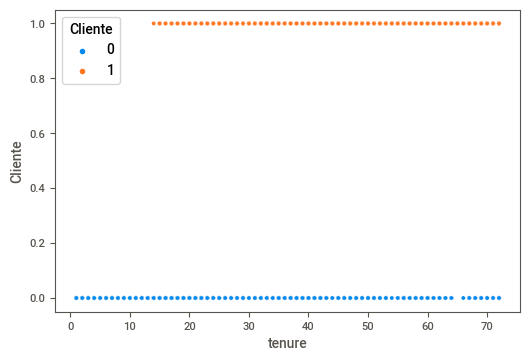

In [ ]:
sns.scatterplot(x='tenure',y='Cliente',hue='Cliente', data=treino)

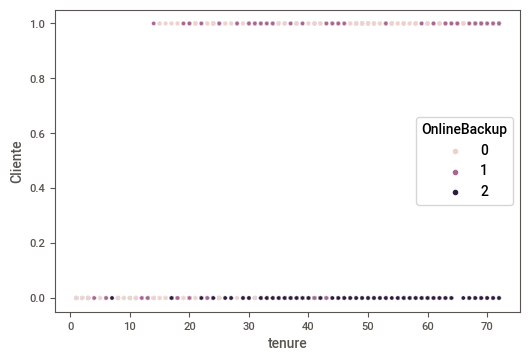

In [ ]:
sns.scatterplot(x='tenure',y='Cliente',hue='OnlineBackup', data=treino)

In [ ]:
X = treino['tenure'].values.reshape(-1,1)
y= treino['Cliente']

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predição utiizando a amostra teste
preditos = reg.predict(teste['tenure'].values.reshape(-1,1))
preditos

array([0.33611706, 0.39441632, 0.03004597, ..., 0.03004597, 1.03570812,
       1.03570812])

In [ ]:
yteste = treino['Cliente']
import numpy as np
np.mean((preditos-yteste)**2)

0.3794012913577872

In [ ]:
#Erro Quadrático Médio
from sklearn.metrics import mean_squared_error
eqm = mean_squared_error(yteste,preditos)
print('EQM : {}'.format(round(eqm,2)))

EQM : 0.38


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1 = reg.coef_
print('Intercepto: \n', b0)
print('Coeficientes: \n',b1)

Intercepto: 
 0.0008963476522928504
Coeficientes: 
 [0.01457481]


*CUSTOS* = B0+B1*TENURE

In [ ]:
import numpy as np
x = np.arange(-5,80,0.01)
y0= b0 +b1*x

In [ ]:
import matplotlib.pyplot as plt

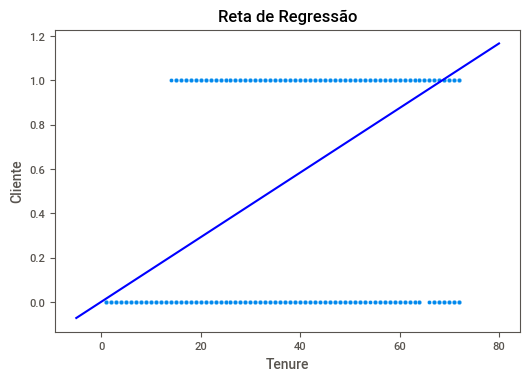

In [ ]:
sns.scatterplot(x ='tenure' ,y = 'Cliente',data =treino)
plt.plot(x,y0,color='blue')
plt.title('Reta de Regressão')
plt.xlabel('Tenure')
plt.ylabel('Cliente')
plt.show()

In [ ]:
reg0 = LinearRegression()
reg0.fit(X,y)

preditos = reg0.predict(X)

eqm = mean_squared_error(y,preditos)
print('EQM: {}'.format(round(eqm,2)))

EQM: 0.12


In [ ]:
X = treino['tenure'].values.reshape(-1,1)
y = treino['Cliente']

In [ ]:
# Resolução
R = 199
eqms = []
from sklearn.model_selection import train_test_split

for i in range(R):  
  Xtreino,Xteste,ytreino,yteste = train_test_split(X,y,test_size= 0.25)
  reg = LinearRegression()
  reg.fit(Xtreino,ytreino)

  preditos = reg.predict(Xteste)

  eqm = mean_squared_error(yteste,preditos)
  eqms.append(eqm)
print(np.mean(eqms))
print(eqms)

0.12228940428078319
[0.12260810841859161, 0.1258317840667421, 0.12679369295603604, 0.12866340307946125, 0.11903108741879792, 0.1278700041086055, 0.12104081561357623, 0.133372478503375, 0.11042430296167927, 0.12338976339082779, 0.12659733033634374, 0.11894597087712763, 0.122524165622405, 0.12062660586853867, 0.12544657250745514, 0.12272606516321803, 0.11683750346817091, 0.13231469746737498, 0.11693430649677317, 0.11865088091463073, 0.13102140351572672, 0.11107488249442356, 0.13178801040420943, 0.12419496964739558, 0.1304538799883999, 0.13204184229437826, 0.12285184995188815, 0.11940450379938553, 0.11892812704724025, 0.13282421269337882, 0.12318808673738858, 0.13201515128679736, 0.12723262564574062, 0.1208600355944071, 0.12157078307266783, 0.1330330477527841, 0.13075681395320635, 0.12862411428383674, 0.11122477052796781, 0.13147193591662895, 0.13216271090561163, 0.11757297769719394, 0.12741076359330056, 0.13363316340544437, 0.12301243903123936, 0.13442041529287208, 0.12879718895320164, 0

In [ ]:
np.std(eqms)

0.0067214338090203175

In [ ]:
# Coeficientes
b0 = reg.intercept_
b1,b2 = reg.coef_
print('Intercepto: \n',reg.intercept_)
print('Coeficientes: \n', reg.coef_)

ValueError: ignored

In [ ]:
x = np.arange(0, 80, 0.01)
y0 = b0 + b1*x +b2*0
y1 = b0 +b1*x + b2*1

In [ ]:
sns.scatterplot(x = 'tenure', y= 'Cliente', hue = 'OnlineBackup',data=treino)
plt.plot(x,y0,color='blue')
plt.plot(x,y1,color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('Tenure')
plt.ylabel('Cliente')
plt.show()

In [ ]:
print(reg.predict(X),y)

In [ ]:
Xtreino

In [ ]:
#submissão: 'Premium': 1 --- 'Normal': 0

import numpy as np

pred = [0, 1] * 1250

In [ ]:
# Arquivo padrão de submissão: 
# - Dataframe com apenas uma coluna, com nome 'Cliente', com os valores 1, para 'premium' e 0 para 'normal'. 
# - O índice do dataframe deve estar numerado de 0 a 2499

subm = pd.DataFrame()
subm['Cliente'] = pred

In [ ]:
subm

In [ ]:
# escrever a submissao em um arquivo
# IMPORTANTE usar o argumento 'index = False'

subm.to_csv('submissão1.csv', index = False)

---

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = treino['tenure'].values.reshape(-1,1)
y = treino['Cliente']
print(X,y)

[[20]
 [59]
 [68]
 ...
 [56]
 [19]
 [57]] 0       0
1       1
2       1
3       1
4       0
       ..
2495    0
2496    1
2497    1
2498    0
2499    1
Name: Cliente, Length: 2500, dtype: int64


In [ ]:
modelo = LogisticRegression()
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = modelo.predict(teste[['tenure']])

In [ ]:
subm = pd.DataFrame()
subm['Cliente'] = pred
subm.to_csv('submissão2.csv', index = False)

In [ ]:
subm

In [ ]:
# alteração simultanea nos dados de treino e teste

#conjuntos = [treino, teste]

#for dados in conjuntos:
 #   dados['Partner'] = dados['Partner'].map({'No': 0, 'Yes': 1})
    

In [ ]:
teste.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,Yes,23,Yes,No,No,No internet service,2,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Female,0,No,No,27,Yes,No,DSL,Yes,1,No,No,No,No,Month-to-month,Yes,Mailed check
2,Male,0,No,No,2,Yes,No,No,No internet service,2,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
3,Female,0,No,No,48,Yes,No,Fiber optic,Yes,0,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
4,Male,0,Yes,No,71,Yes,No,Fiber optic,No,1,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check


In [ ]:
X = treino['tenure'].values.reshape(-1,1)
y = treino['Cliente']
print(X,y)

[[20]
 [59]
 [68]
 ...
 [56]
 [19]
 [57]] 0       0
1       1
2       1
3       1
4       0
       ..
2495    0
2496    1
2497    1
2498    0
2499    1
Name: Cliente, Length: 2500, dtype: int64


In [ ]:
def HoldoutRep( modelo = LinearRegression(), replicas = 100, proporcao = 0.25):
  from sklearn.metrics import mean_squared_error
  from sklearn.model_selection import train_test_split

  
  eqms_treino = []
  eqms_teste = []

  for i in range(replicas):
      Xtreino, Xtest, ytreino, yteste = train_test_split(X, y, test_size = proporcao)

      #Treinando o Modelo
      reg = modelo
      reg.fit(Xtreino, ytreino)

      #Verificando eqm no teste
      preditos_treino = reg.predict(Xtreino)
      eqm_treino = mean_squared_error(ytreino, preditos_treino)

      preditos_teste = reg.predict(Xteste)
      eqm_teste = mean_squared_error(yteste, preditos_teste)

      #Guardando o resultado
      eqms_treino.append(eqm_treino)
      eqms_teste.append(eqm_teste)
    
  res_treino = np.array(eqms_treino).mean().round(2)
  res_teste = np.array(eqms_teste).mean().round(2)

  print('EQM média de TREINO: {}'.format(res_treino))
  print('EQM média de TEST: {}'.format(res_teste))

  return res_treino, res_teste



In [ ]:
Xtreino.shape

(1875, 1)

In [ ]:
Xtreino

array([[53],
       [61],
       [13],
       ...,
       [ 7],
       [ 3],
       [ 1]])

In [ ]:
HoldoutRep(replicas=100)

EQM média de TREINO: 0.12
EQM média de TEST: 0.37


(0.12, 0.37)

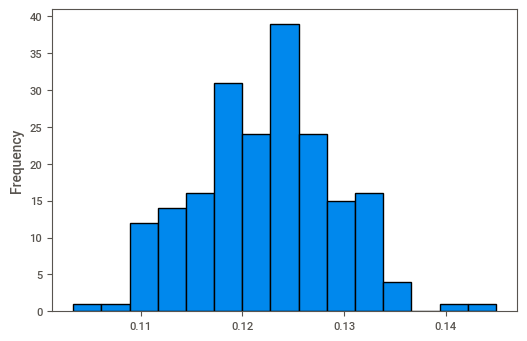

In [ ]:
pd.Series(eqms).plot(kind='hist', bins=15, edgecolor = 'black')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors= 6)
knnreg.fit(Xtreino,ytreino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [ ]:
from sklearn.metrics import mean_squared_error

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino,ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(eqm_treino))
print('O Erro Quadrático Médio de TESTE foi: {:.2f}'.format(eqm_teste))

O Erro Quadrático Médio de TREINO foi: 0.12
O Erro Quadrático Médio de TESTE foi: 0.12


In [ ]:
HoldoutRep(modelo= KNeighborsRegressor(n_neighbors=100), replicas=100)


EQM média de TREINO: 0.11
EQM média de TEST: 0.39


(0.11, 0.39)

In [ ]:
X = treino[['tenure','OnlineBackup']]
y = treino['Cliente']
#X = treino['tenure','OnlineBackup'].values.reshape(-1, 1)
#y = treino['Cliente']
print(X,y)


      tenure  OnlineBackup
0         20             2
1         59             1
2         68             1
3         35             0
4          1             0
...      ...           ...
2495      13             1
2496      24             0
2497      56             0
2498      19             0
2499      57             0

[2500 rows x 2 columns] 0       0
1       1
2       1
3       1
4       0
       ..
2495    0
2496    1
2497    1
2498    0
2499    1
Name: Cliente, Length: 2500, dtype: int64


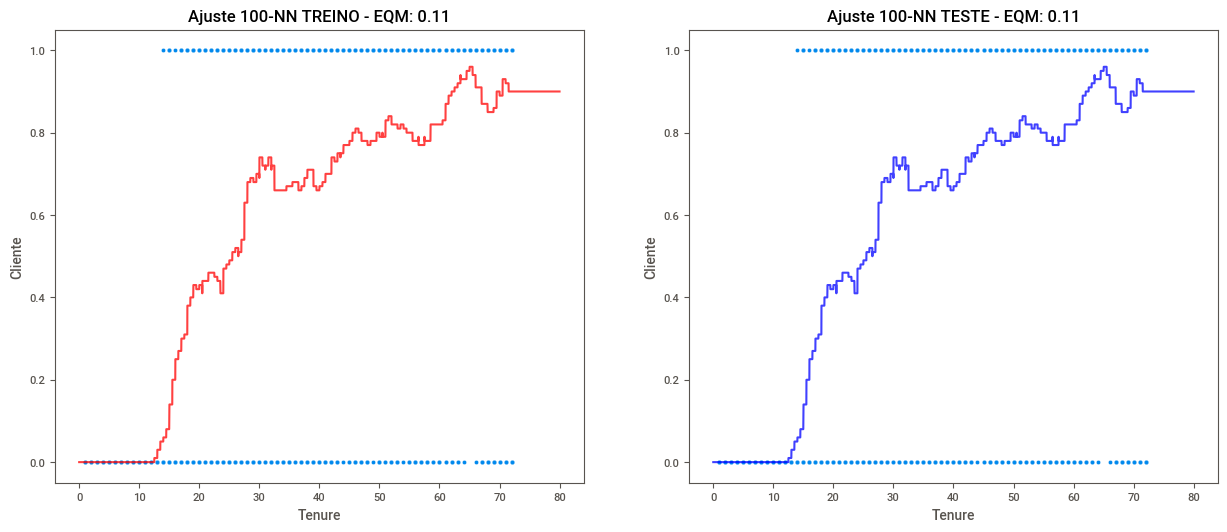

In [ ]:
k = 100
knnreg = KNeighborsRegressor(n_neighbors = k)
knnreg.fit(Xtreino, ytreino)

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(0, 80, 0.01)
y0 = knnreg.predict(x.reshape(-1, 1))

plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=Xtreino.reshape(-1),y=ytreino)
plt.plot(x, y0, color = 'red', alpha = 0.75)
plt.title('Ajuste {}-NN TREINO - EQM: '.format(k)+str(round(eqm_treino,2)))
plt.xlabel('Tenure')
plt.ylabel('Cliente')

plt.subplot(1, 2, 2)
sns.scatterplot(x=Xtreino.reshape(-1),y=ytreino)
plt.plot(x, y0, color = 'blue', alpha = 0.75)
plt.title('Ajuste {}-NN TESTE - EQM: '.format(k)+str(round(eqm_teste,2)))
plt.xlabel('Tenure')
plt.ylabel('Cliente')
plt.show()

In [ ]:
Xtreino.shape

(1875, 1)

In [ ]:
Xteste.shape

(625, 1)

**Árvore de Regressão**

In [ ]:
X = treino['tenure'].values.reshape(-1,1)
y= treino['Cliente']

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

In [ ]:
#Treinando o Modelo
from sklearn.tree import DecisionTreeRegressor

arvore = DecisionTreeRegressor()
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

print('O Erro Quadrático Médio no TREINO foi: {:.2f}'.format(eqm_treino))
print('O Erro Quadrático Médio no TESTE foi: {:.2f}'.format(eqm_teste))


O Erro Quadrático Médio no TREINO foi: 0.10
O Erro Quadrático Médio no TESTE foi: 0.11


In [ ]:
HoldoutRep(modelo = DecisionTreeRegressor(max_depth = 20,min_samples_split = 200,),replicas =100)

EQM média de TREINO: 0.11
EQM média de TEST: 0.39


(0.11, 0.39)

In [ ]:
?DecisionTreeRegressor

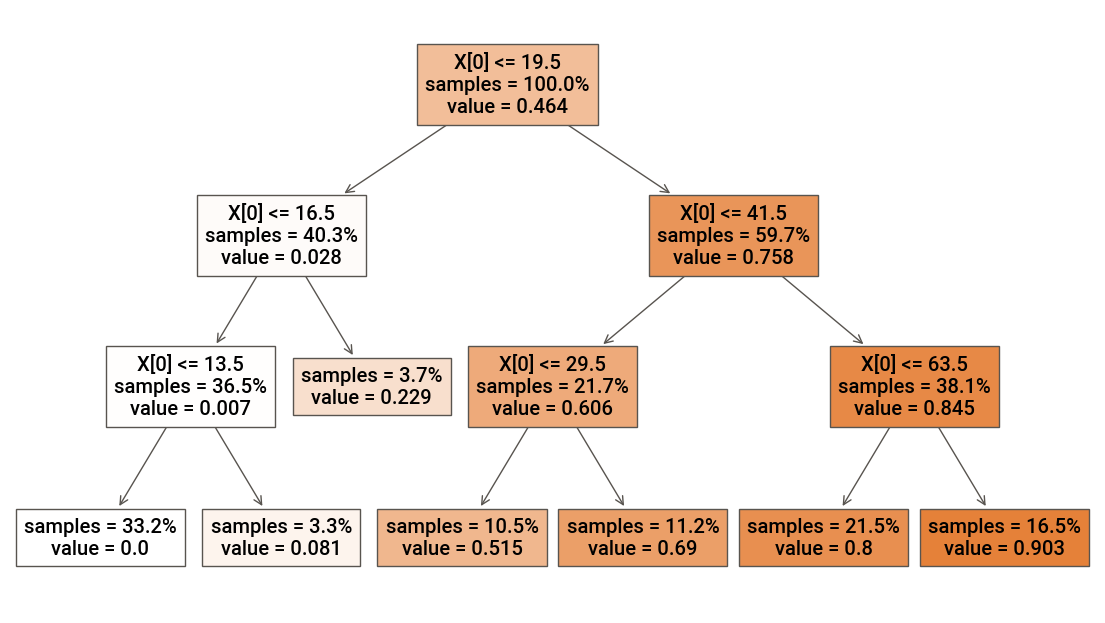

In [ ]:
from sklearn.tree import plot_tree

arvore = DecisionTreeRegressor(max_depth = 3,min_samples_split = 200)
arvore.fit(Xtreino, ytreino)

plt.figure( figsize=(14,8))
plot_tree (arvore,filled=True, proportion = True, impurity=False)#, feature_names=Xteste'ternure'])
plt.show()

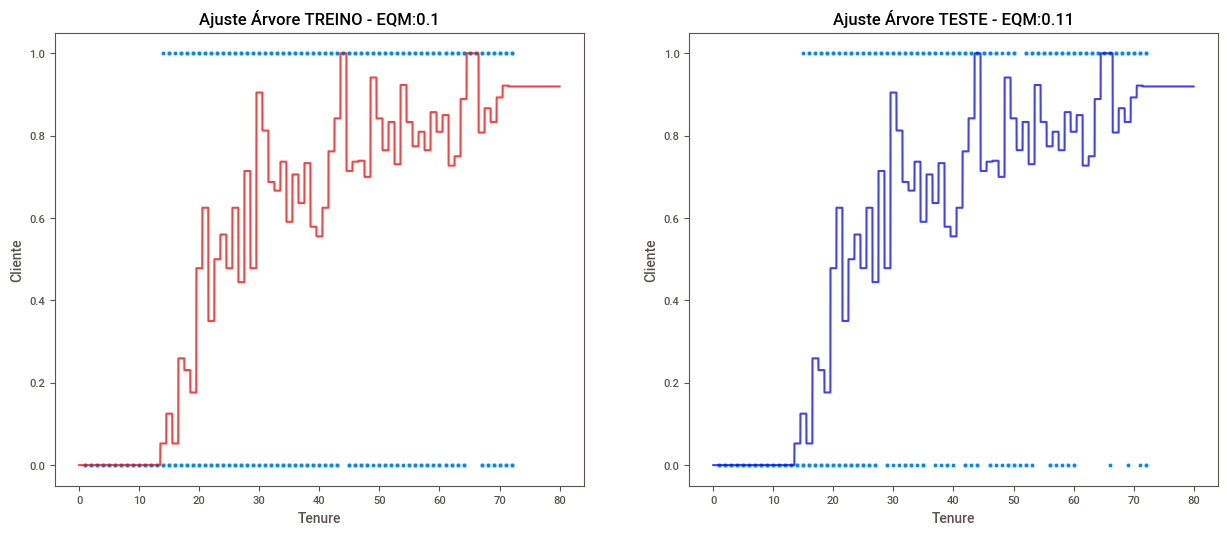

In [ ]:
# Gráficos do ajuste

profundidade = 100
arvore = DecisionTreeRegressor(max_depth = profundidade,min_samples_split = 5)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(0,80,0.01)
y0 = arvore.predict(x.reshape(-1,1))

plt.figure(figsize = (15,6))

plt.subplot( 1, 2, 1)
sns.scatterplot(x = Xtreino.reshape(-1), y = ytreino)
plt.plot(x, y0, color = 'red', alpha = 0.75)
plt.title('Ajuste Árvore TREINO - EQM:' + str(round(eqm_treino,2)))
plt.xlabel('Tenure')
plt.ylabel('Cliente')

plt.subplot( 1, 2, 2)
sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, color = 'blue', alpha = 0.75)
plt.title('Ajuste Árvore TESTE - EQM:' + str(round(eqm_teste,2)))
plt.xlabel('Tenure')
plt.ylabel('Cliente')
plt.show()

In [ ]:
r = 1000
reglin = HoldoutRep(modelo = LinearRegression(),replicas= r)
arvore1 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth=1),replicas= r)
arvore3 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth=3),replicas= r)
arvore5 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth=5),replicas= r)
arvore7 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth=7),replicas= r)
knn1 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors=1),replicas= r)
knn10 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors=10),replicas= r)
knn30 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors=30),replicas= r)
knn90 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors=90),replicas= r)

EQM média de TREINO: 0.12
EQM média de TEST: 0.38
EQM média de TREINO: 0.12
EQM média de TEST: 0.37
EQM média de TREINO: 0.11
EQM média de TEST: 0.39
EQM média de TREINO: 0.11
EQM média de TEST: 0.39
EQM média de TREINO: 0.1
EQM média de TEST: 0.39
EQM média de TREINO: 0.21
EQM média de TEST: 0.5
EQM média de TREINO: 0.11
EQM média de TEST: 0.4
EQM média de TREINO: 0.11
EQM média de TEST: 0.39
EQM média de TREINO: 0.11
EQM média de TEST: 0.39


In [ ]:
modelos = [reglin, arvore1, arvore3, arvore5, arvore7, knn1, knn10, knn30, knn90]

nomes = ['Reg. Linear', 'Arvore (prof =1)', 'Arvore (prof = 3)', 'Arvore (prof = 5)', 'Arvore (prof = 7)', 'KNN (k = 1)', 'KNN (k = 10)', 'KNN (k = 30)', 'KNN (k = 90)']

In [ ]:
resultados = pd.DataFrame(modelos, index = nomes, columns = ['EQM Treino','EQM Teste'])
resultados

,EQM Treino,EQM Teste
Reg. Linear,0.12,0.38
Arvore (prof =1),0.12,0.37
Arvore (prof = 3),0.11,0.39
Arvore (prof = 5),0.11,0.39
Arvore (prof = 7),0.10,0.39
KNN (k = 1),0.21,0.50
KNN (k = 10),0.11,0.40
KNN (k = 30),0.11,0.39
KNN (k = 90),0.11,0.39


In [ ]:
resultados.sort_values(by = 'EQM Teste')

,EQM Treino,EQM Teste
Arvore (prof =1),0.12,0.37
Reg. Linear,0.12,0.38
Arvore (prof = 3),0.11,0.39
Arvore (prof = 5),0.11,0.39
Arvore (prof = 7),0.10,0.39
KNN (k = 30),0.11,0.39
KNN (k = 90),0.11,0.39
KNN (k = 10),0.11,0.40
KNN (k = 1),0.21,0.50


**Gráficos do ajuste com duas variáveis**

In [ ]:
X = treino[['tenure','OnlineBackup']]
y = treino['Cliente']


Regressão Linear

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

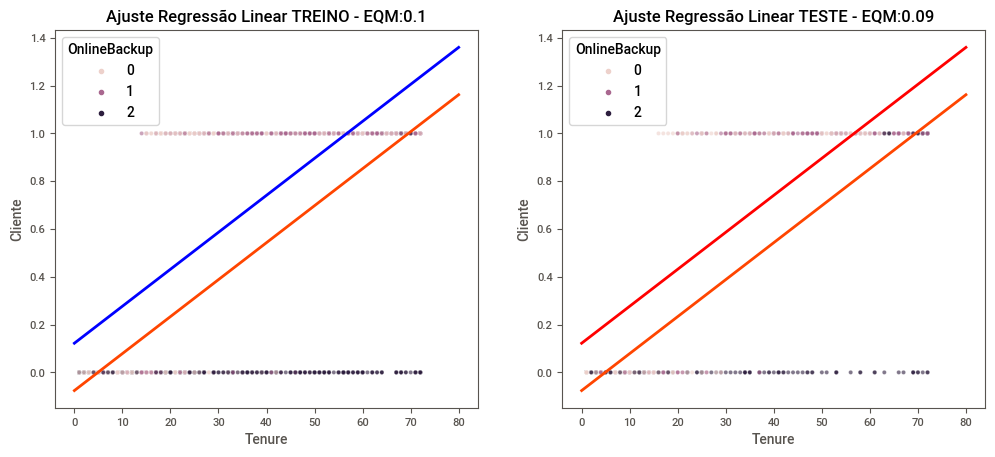

In [ ]:
modelo = LinearRegression()
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(0, 80, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['tenure','OnlineBackup']).T
c1 = pd.DataFrame([x, v1], index = ['tenure','OnlineBackup']).T

d0= modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize=(12, 5))

plt.subplot( 1, 2, 1)
sns.scatterplot(x = Xtreino['tenure'],y=ytreino,hue = Xtreino['OnlineBackup'], alpha= 0.6)
plt.plot(x, d0,'-',color = 'blue', linewidth = 2)
plt.plot(x, d1,'-',color = 'orangered', linewidth = 2)
plt.title('Ajuste Regressão Linear TREINO - EQM:' + str(round(eqm_treino,2)))
plt.xlabel('Tenure')
plt.ylabel('Cliente')

plt.subplot( 1, 2, 2)
sns.scatterplot(x = Xteste['tenure'],y=yteste,hue = Xteste['OnlineBackup'], alpha= 0.6)
plt.plot(x, d0,'-',color = 'red', linewidth = 2)
plt.plot(x, d1,'-',color = 'orangered', linewidth = 2)
plt.title('Ajuste Regressão Linear TESTE - EQM:' + str(round(eqm_teste,2)))
plt.xlabel('Tenure')
plt.ylabel('Cliente')
plt.show()

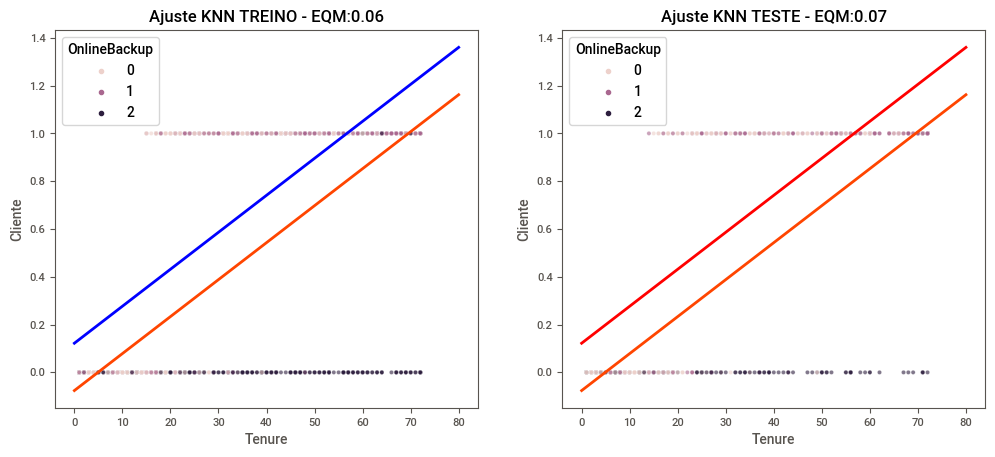

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

k = 15

knnreg = KNeighborsRegressor(n_neighbors = k)
knnreg.fit(Xtreino, ytreino)

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(0, 80, 0.01)
f0 = np.zeros(len(x))
g1 = np.ones(len(x))

r0 = pd.DataFrame([x, f0], index = ['tenure','OnlineBackup']).T
r1 = pd.DataFrame([x, g1], index = ['tenure','OnlineBackup']).T

w0= modelo.predict(r0)
w1 = modelo.predict(r1)

plt.figure(figsize=(12, 5))

plt.subplot( 1, 2, 1)
sns.scatterplot(x = Xtreino['tenure'],y=ytreino,hue = Xtreino['OnlineBackup'], alpha= 0.6)
plt.plot(x, w0,'-',color = 'blue', linewidth = 2)
plt.plot(x, w1,'-',color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN TREINO - EQM:' + str(round(eqm_treino,2)))
plt.xlabel('Tenure')
plt.ylabel('Cliente')

plt.subplot( 1, 2, 2)
sns.scatterplot(x = Xteste['tenure'],y=yteste,hue = Xteste['OnlineBackup'], alpha= 0.6)
plt.plot(x, w0,'-',color = 'red', linewidth = 2)
plt.plot(x, w1,'-',color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN TESTE - EQM:' + str(round(eqm_teste,2)))
plt.xlabel('Tenure')
plt.ylabel('Cliente')
plt.show()

Árvore de Decisão

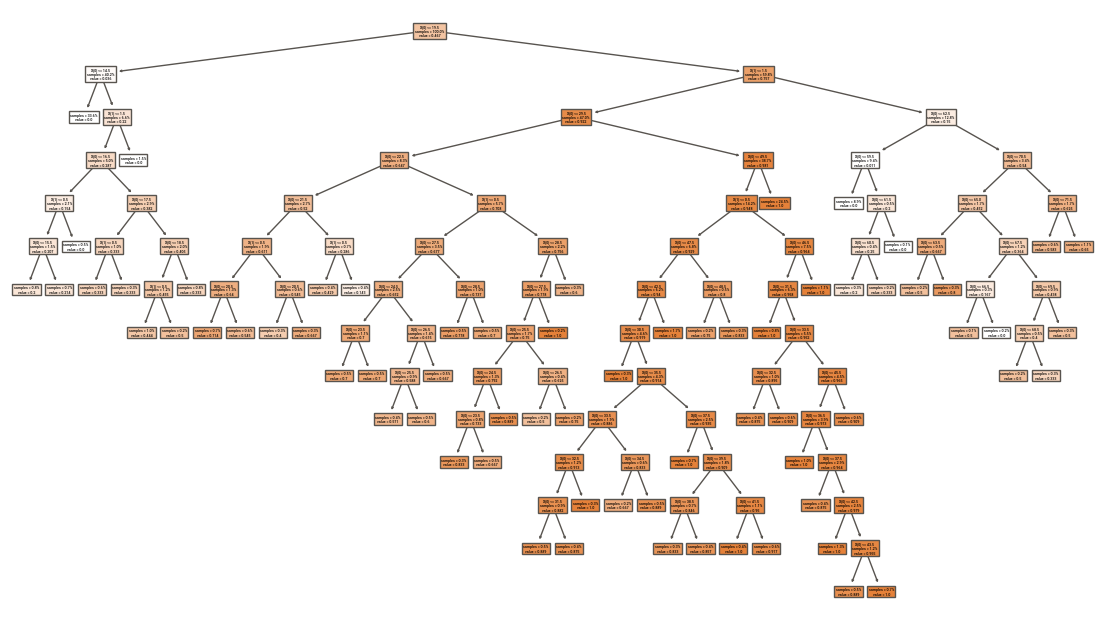

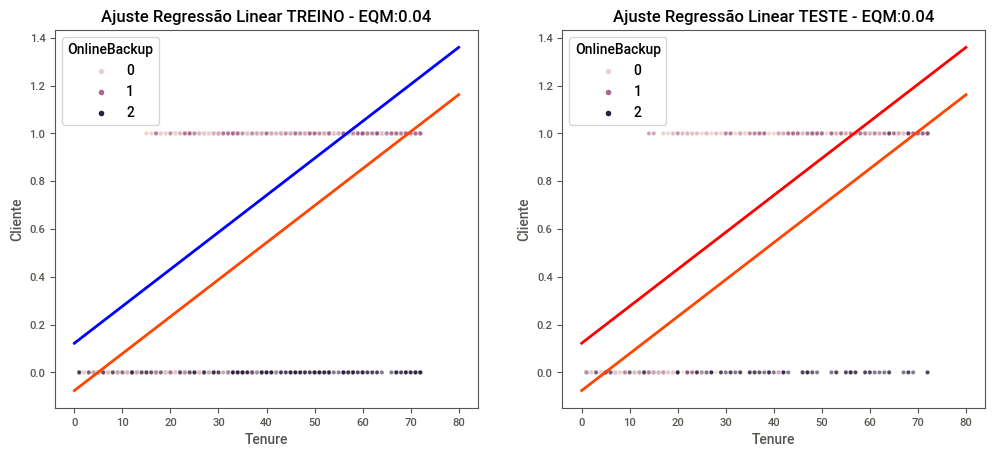

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

profundidade = 15
arvore = DecisionTreeRegressor(max_depth = profundidade,min_samples_split = 5)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

plt.figure( figsize=(14,8))
plot_tree (arvore,filled=True, proportion = True, impurity=False)#, feature_names=Xteste'ternure'])
plt.show()

import numpy as np

x = np.arange(0,80,0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['tenure','OnlineBackup']).T
c1 = pd.DataFrame([x, v1], index = ['tenure','OnlineBackup']).T

d0= modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize=(12, 5))

plt.subplot( 1, 2, 1)
sns.scatterplot(x = Xtreino['tenure'],y=ytreino,hue = Xtreino['OnlineBackup'], alpha= 0.6)
plt.plot(x, d0,'-',color = 'blue', linewidth = 2)
plt.plot(x, d1,'-',color = 'orangered', linewidth = 2)
plt.title('Ajuste Regressão Linear TREINO - EQM:' + str(round(eqm_treino,2)))
plt.xlabel('Tenure')
plt.ylabel('Cliente')

plt.subplot( 1, 2, 2)
sns.scatterplot(x = Xteste['tenure'],y=yteste,hue = Xteste['OnlineBackup'], alpha= 0.6)
plt.plot(x, d0,'-',color = 'red', linewidth = 2)
plt.plot(x, d1,'-',color = 'orangered', linewidth = 2)
plt.title('Ajuste Regressão Linear TESTE - EQM:' + str(round(eqm_teste,2)))
plt.xlabel('Tenure')
plt.ylabel('Cliente')
plt.show()

In [ ]:
X = treino[['tenure','OnlineBackup']]
y = treino['Cliente']

**Validação Cruzada**

In [ ]:
# Configuração da Validação Cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [ ]:
kf = KFold(n_splits= 10, shuffle= True)

**Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()

In [ ]:
y.describe()

count    2500.000000
mean        0.470800
std         0.499246
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Cliente, dtype: float64

Desempenho do Modelo

In [ ]:
metricas = cross_validate(modelo, X, y, cv = kf, scoring = ['f1'])#, 'recall','precision'])

In [ ]:
metricas['test_f1'] # f1

array([0.87659574, 0.90697674, 0.89177489, 0.85365854, 0.86222222,
       0.88549618, 0.86238532, 0.88695652, 0.88785047, 0.83168317])

In [ ]:
AdaBoostClassifier()

NameError: ignored